# Credit Scoring - EDA
by Deviyanti Aryani Mariam


In this project, we will analyse a given historical borrowers data and will use supervised learning techniques to build credit scoring model. Then, we also will decide the threshold of the score or probability to default that can give us default rate below 3% and approval rate higher than 70%. The credit scorecard will also be provided to help nontechnical team use our model aligning with their plan.


The notebook focuses on Exploratory Data Analysis to get some insight and help us decide the important features that will  be used in our model. To see how the credit score model is built, open the other one jupyter file <b> Credit Scoring - Modeling </b>

Stages:
- Import Libraries
- Load data, look at data size, structure, missing values
- Analyse, identify and explore the data


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None) 


## Load Data

In [2]:
def read_file(path):
    """
    open a csv file and shows data size, missing values, type
    
    input: file path (string)
    output: dataframe
    """
    
    data=pd.read_csv(path)
    print('SHAPE',data.shape)
    print('=========================')# Investigate null rate of contained null columns
    print('MISSING VALUES')
    print('column, total_row_missing, missing value ratio')
    df_missing_rate=pd.DataFrame([],columns=['column','total_row_missing','missing_value_rate'])
    for i,j in zip(data.columns,data.isna().sum()):
        if j>0:
            df_missing_rate=df_missing_rate.append({'column':i,'total_row_missing':j,'missing_value_rate':'{}%'.format(data[i].isnull().sum()*100 / data.shape[0])},ignore_index=True) 
    print(df_missing_rate)
    print('=========================')
    print('TYPE\n{}'.format(data.dtypes))
    return data,df_missing_rate

In [3]:
file_path='data.csv'
df,df_missing_rate=read_file(file_path)
df.head()

SHAPE (15645, 24)
MISSING VALUES
column, total_row_missing, missing value ratio
                 column total_row_missing    missing_value_rate
0      total_cash_usage                45  0.28763183125599234%
1           branch_code               195      1.2464046021093%
2  overlimit_percentage                26  0.16618728028124002%
3     delinquency_score                88    0.562480025567274%
4    utilization_6month              2842   18.165548098434005%
TYPE
X                                       int64
number_of_cards                         int64
outstanding                             int64
credit_limit                          float64
bill                                  float64
total_cash_usage                      float64
total_retail_usage                    float64
remaining_bill                        float64
branch_code                            object
payment_ratio                         float64
overlimit_percentage                  float64
payment_ratio_3month     

,X,number_of_cards,outstanding,credit_limit,bill,total_cash_usage,total_retail_usage,remaining_bill,branch_code,payment_ratio,overlimit_percentage,payment_ratio_3month,payment_ratio_6month,delinquency_score,default_flag,years_since_card_issuing,total_usage,remaining_bill_per_number_of_cards,remaining_bill_per_limit,total_usage_per_limit,total_3mo_usage_per_limit,total_6mo_usage_per_limit,utilization_3month,utilization_6month
0,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,0.0,0.00,0.00,NaN,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
1,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,0.0,100.00,100.91,NaN,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,NaN
2,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,0.0,97.49,99.84,NaN,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571
3,6,2,6227439,80000000.0,2081248.0,0.0,3690250.0,4613435.0,A,0.00,0.0,28.46,42.03,NaN,0,10.250000,3690250.0,2306717.5,0.057668,0.046128,0.017184,0.117513,0.038964,0.181863
4,7,2,3906290,4000000.0,2043682.0,0.0,230400.0,3314046.0,A,18.47,0.0,24.95,17.89,NaN,0,4.666667,230400.0,1657023.0,0.828511,0.057600,0.018750,0.166667,1.014776,0.977231


In [4]:
df_missing_rate

,column,total_row_missing,missing_value_rate
0,total_cash_usage,45,0.28763183125599234%
1,branch_code,195,1.2464046021093%
2,overlimit_percentage,26,0.16618728028124002%
3,delinquency_score,88,0.562480025567274%
4,utilization_6month,2842,18.165548098434005%


## EXPLORE DATA

In order to build machine learning with better performance in next jupyter file, first we need to explore the datasets which includes deciding which feature fall into categorical or numeric, visualizing the data distribution, or using correlation values, etc. In that way, we can have a better understanding on how the dataset looks like and how to select the important features to support the model implementation.

In [5]:
df.set_index('X',inplace=True)

In [6]:
# Classify features into either numerical or categorical
col_target = 'default_flag'
col_list = list(df.drop(col_target,axis=1).columns)
col_numerical = list(df[col_list].select_dtypes(include=np.number).columns)
col_categorical = list(df[col_list].select_dtypes(include=np.object).columns)
print('NUMERICAL:',len(col_numerical),'out of',len(col_list), 'columns')
[ print(i) for i in col_numerical]
print('=========================')
print('CATEGORICAL:',len(col_categorical),'out of',len(col_list), 'columns')
for i in col_categorical:
    print(i)

NUMERICAL: 21 out of 22 columns
number_of_cards
outstanding
credit_limit
bill
total_cash_usage
total_retail_usage
remaining_bill
payment_ratio
overlimit_percentage
payment_ratio_3month
payment_ratio_6month
delinquency_score
years_since_card_issuing
total_usage
remaining_bill_per_number_of_cards
remaining_bill_per_limit
total_usage_per_limit
total_3mo_usage_per_limit
total_6mo_usage_per_limit
utilization_3month
utilization_6month
CATEGORICAL: 1 out of 22 columns
branch_code


In [7]:
# the number of label comparison
pd.DataFrame({'count' : df.groupby( [ "default_flag"]).size(),'ratio':df.groupby( [ "default_flag"]).size()/df.shape[0] }).reset_index()

,default_flag,count,ratio
0,0,14229,0.909492
1,1,1416,0.090508


In [8]:
# check the descriptive statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
number_of_cards,15645,NaN,NaN,NaN,2.50604,1.01254,1,2,2,3,16
outstanding,15645,NaN,NaN,NaN,1.16062e+07,2.40794e+07,0,1.9928e+06,4.71878e+06,1.06653e+07,7.98059e+08
credit_limit,15645,NaN,NaN,NaN,2.08201e+07,2.95542e+07,3e+06,5e+06,9e+06,2.2e+07,1e+09
bill,15645,NaN,NaN,NaN,8.07644e+06,1.75998e+07,20043,813947,3.14137e+06,7.40407e+06,6.28e+08
total_cash_usage,15600,NaN,NaN,NaN,74576.2,617787,0,0,0,0,2.88406e+07
total_retail_usage,15645,NaN,NaN,NaN,2.02481e+06,7.90934e+06,-1.56672e+07,0,200000,1.3962e+06,2.85e+08
remaining_bill,15645,NaN,NaN,NaN,8.1468e+06,1.92467e+07,0,0,2.74716e+06,7.14246e+06,4.44e+08
branch_code,15450,11,A,8705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_ratio,15645,NaN,NaN,NaN,7.03689,792.912,-49860,-17.3,0,44.6,68983
overlimit_percentage,15619,NaN,NaN,NaN,3.33065,9.21515,0,0,0,1.01,190


## Analyse data and find the features that have significant relationship with the taget

number_of_cards


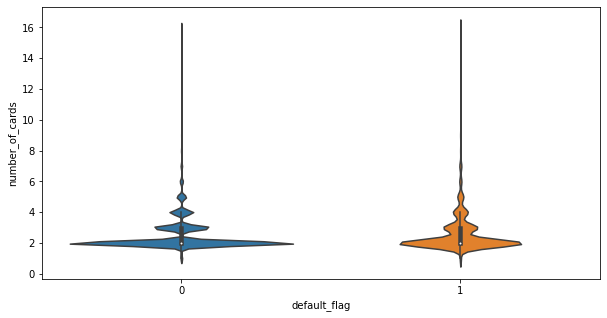

outstanding


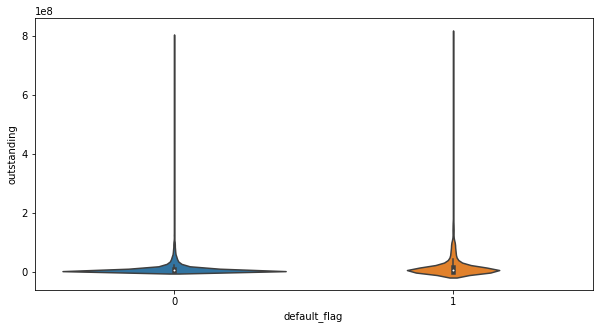

credit_limit


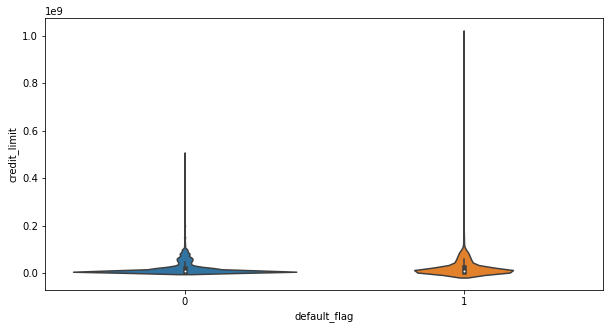

bill


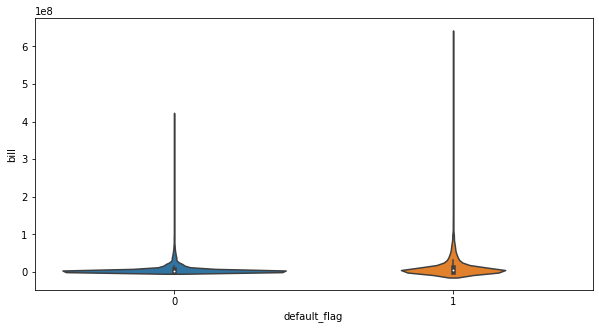

total_cash_usage


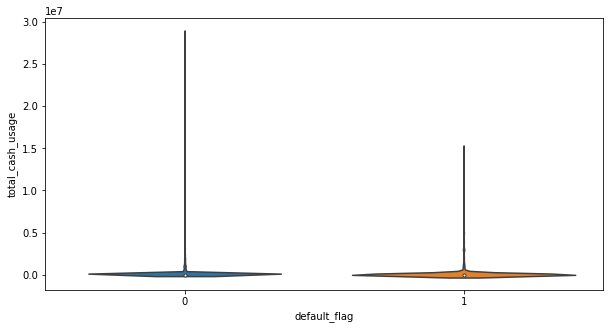

total_retail_usage


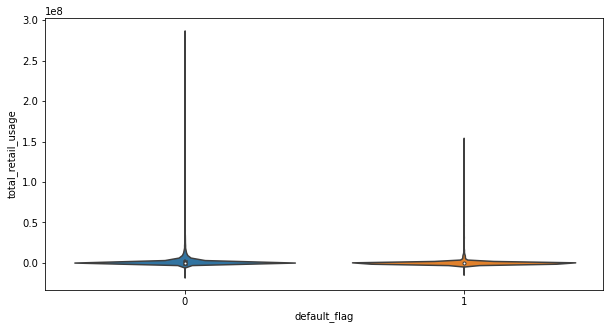

remaining_bill


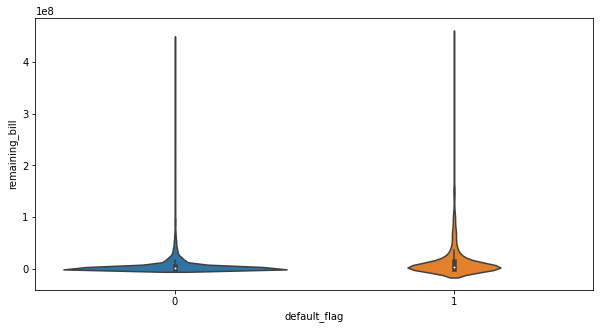

payment_ratio


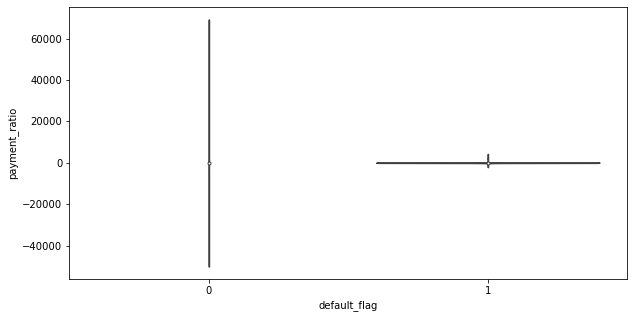

overlimit_percentage


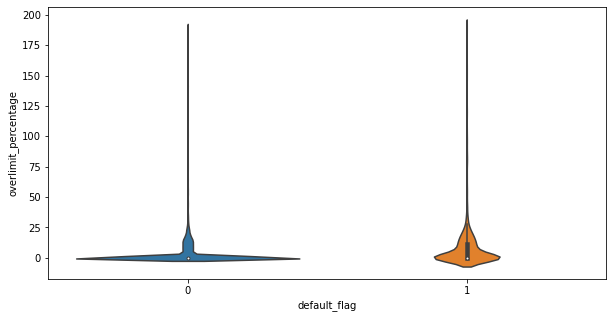

payment_ratio_3month


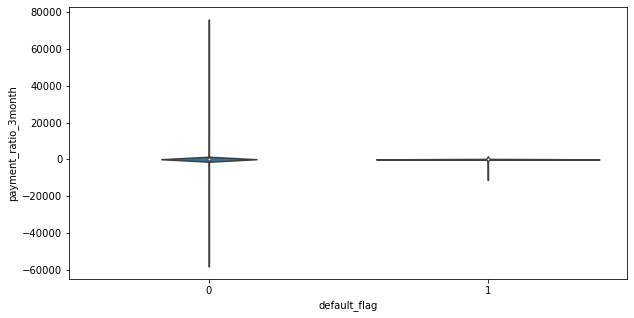

payment_ratio_6month


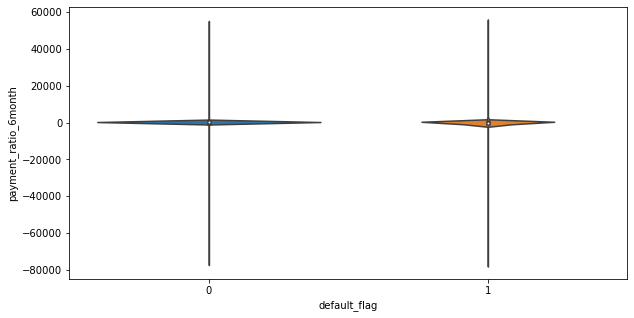

delinquency_score


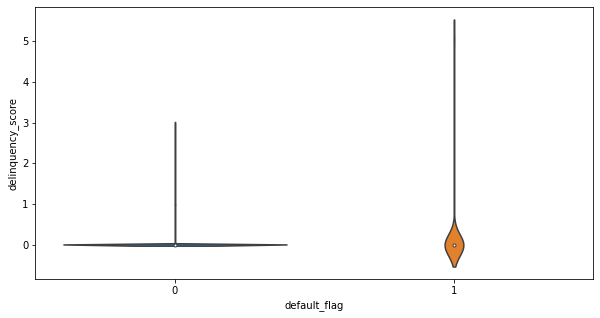

years_since_card_issuing


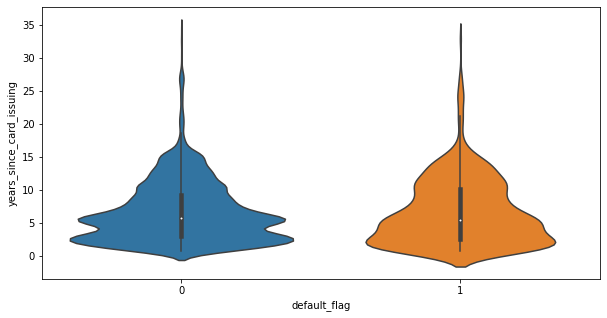

total_usage


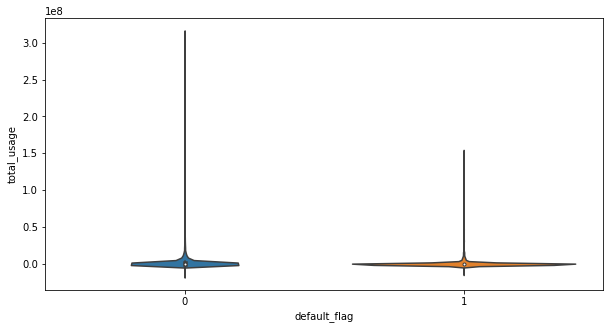

remaining_bill_per_number_of_cards


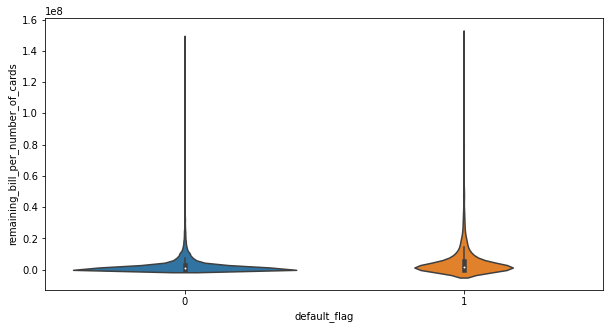

remaining_bill_per_limit


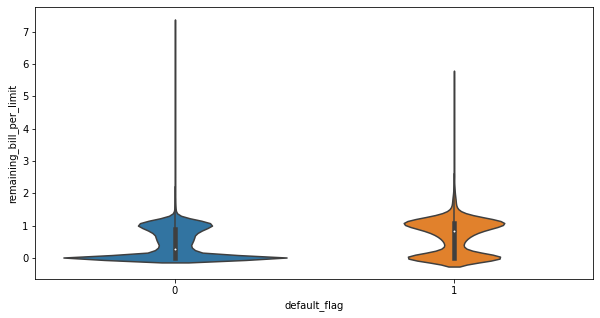

total_usage_per_limit


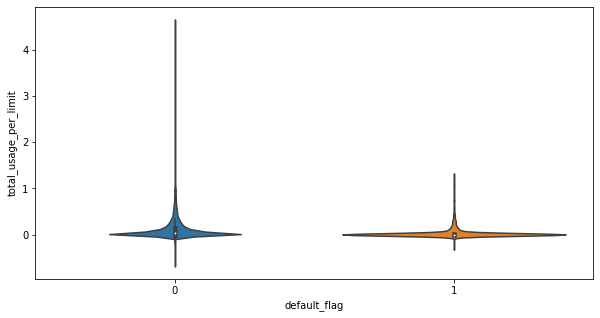

total_3mo_usage_per_limit


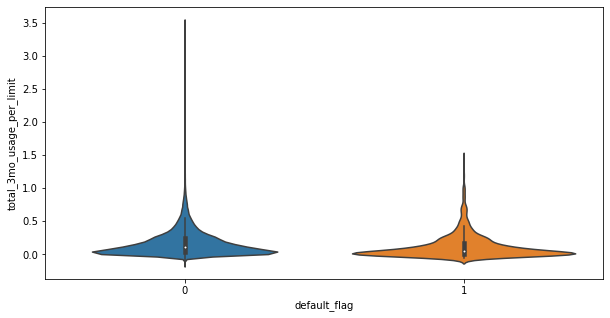

total_6mo_usage_per_limit


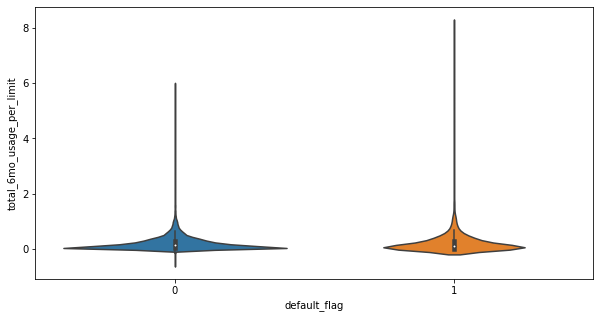

utilization_3month


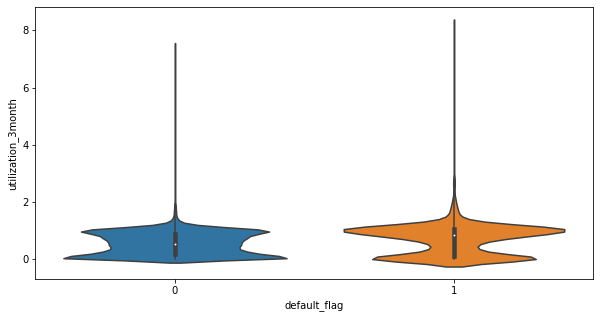

utilization_6month


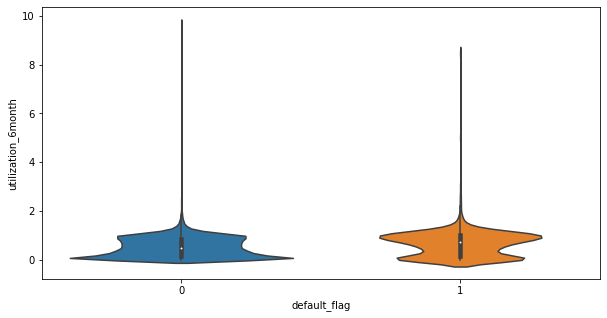

In [9]:
#Boxplot for all numeric features to know the data distribution between good and bad label
for i in df.columns.tolist():
    if i not in col_categorical and i!=col_target and i!='X':
        data_new=df[~df[i].isna()][[i,col_target]]
        if len(data_new)>0:
            print(i)
            plt.figure(figsize=(10,5))
            sns.violinplot(data=data_new,x=col_target,y=i)
            plt.show()

From list of pictures above, we can roughly tell the good features may be the ones with the plots are very distinct between default flag 0 and 1. So, the ones that dont have significant difference which may indicate bad features that are insensitive to the target are: payment_ratio, payment_ratio_3month, payment_ratio_6month. But we still need to do further analysis before a decision can be taken.

In [37]:
def distribution_plot(df,columns,col_target):
    """ 
    Plot probability distribution of numerical features
    input: 
        dataframe, 
        list of numerical column names,
        target column name
    """ 
    leng = len(columns)
    for i,j in zip(range(0,leng),columns):
        f, ax = plt.subplots()
        sns.kdeplot(df.loc[df[col_target] == 0,j],ax=ax,label='Not default',color='blue',shade=True)
        ax2 = ax.twinx()
        sns.kdeplot(df.loc[df[col_target] == 1,j],ax=ax2,label='Default',color='orange',shade=True)
        ax.set_ylabel('Density', fontsize = 10)
        ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0.1)
        ax2.legend(bbox_to_anchor=(1, 0.9), loc='upper right', borderaxespad=0.1)
        plt.title(j)
        plt.show()
   

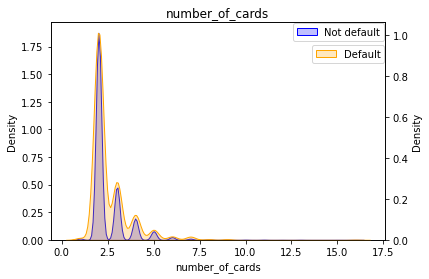

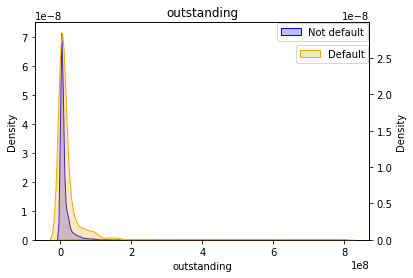

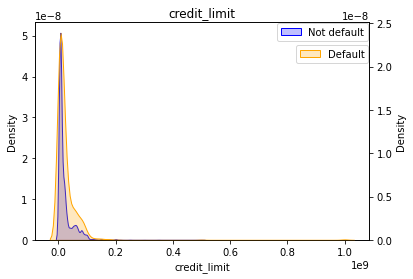

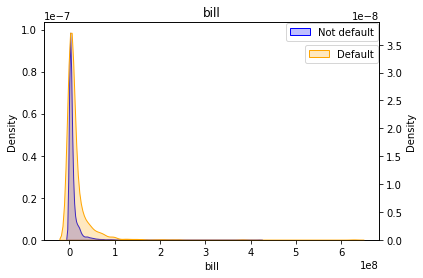

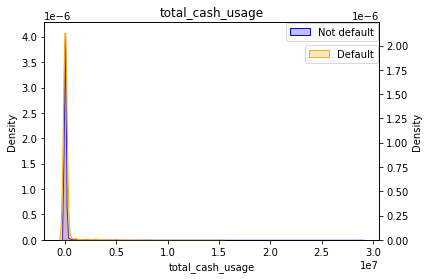

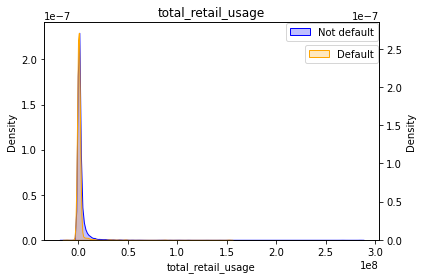

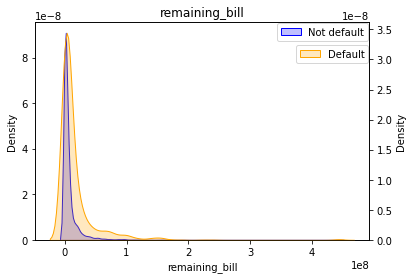

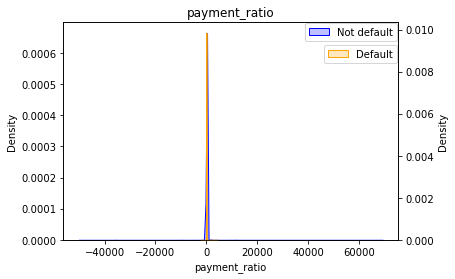

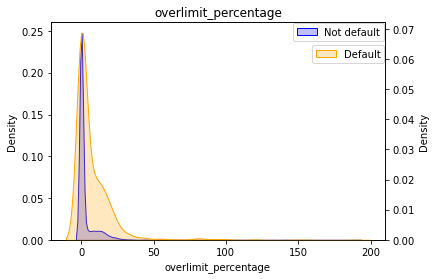

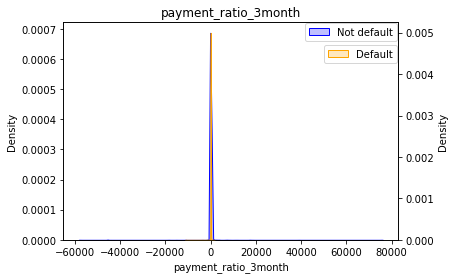

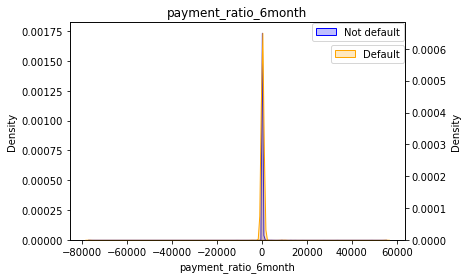

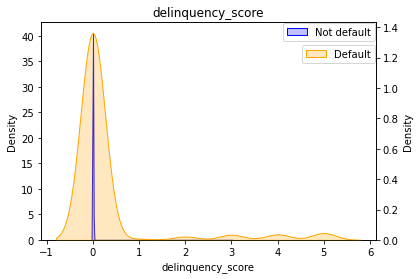

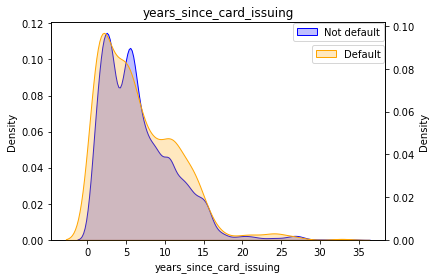

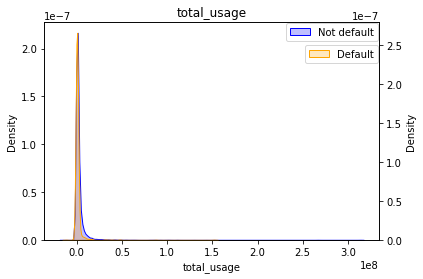

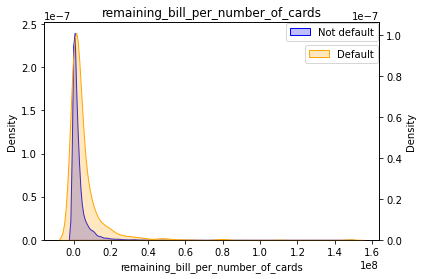

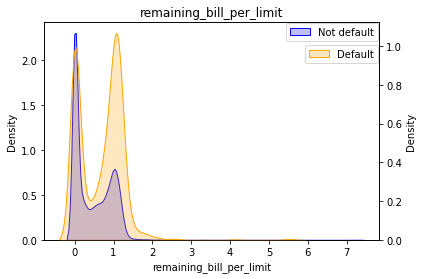

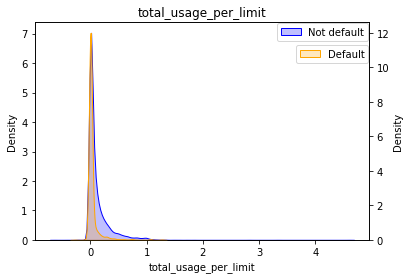

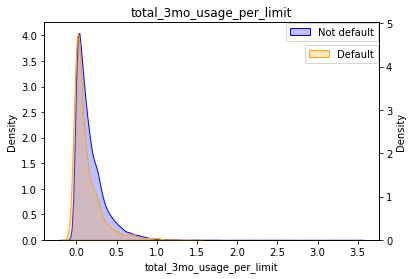

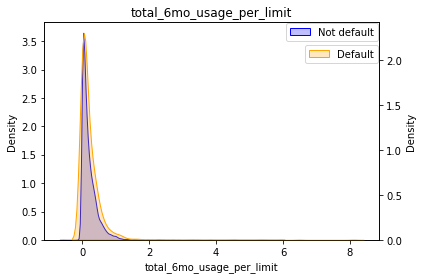

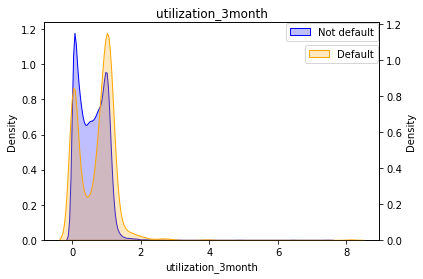

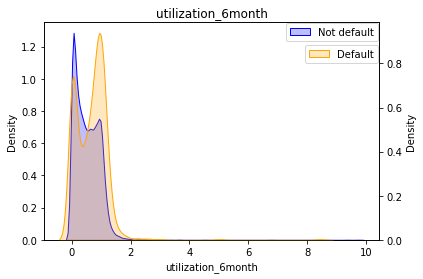

In [38]:
distribution_plot(df,col_numerical,'default_flag')

Looking at the given distribution plots, the features that may be significant are delinquency_score, remaining_bill_per_limit, utilization_3month, utilization_6month

In [42]:
def bar_plot(df,cat_columns,col_target):
    """
    Plot distribution to target
    input:
        dataframe,
        list of categorical column names,
        target column name
    """
    leng = len(cat_columns)
    for i,j in zip(range(0,leng),cat_columns):
        df_temp = df.groupby(j)[col_target].agg([lambda x:1-np.mean(x), np.mean])
        df_temp.columns = ['Not default', 'default']        
        f,ax = plt.subplots(figsize=(10,5))
        df_temp.plot(kind='barh',stacked=True, ax=ax)
        ax.set_xlim(xmin=0)
        ax.set_xticks([k*0.1 for k in range(0,11)])
        vals= ax.get_xticks()
        ax.set_xlabel('% total application')
        ax.set_xticklabels(['{:,.1%}'.format(x) for x in vals])
        lgd = ax.legend(bbox_to_anchor=(1, 1.2), loc='upper right', borderaxespad=0.1)
        plt.title(j)
        plt.show()

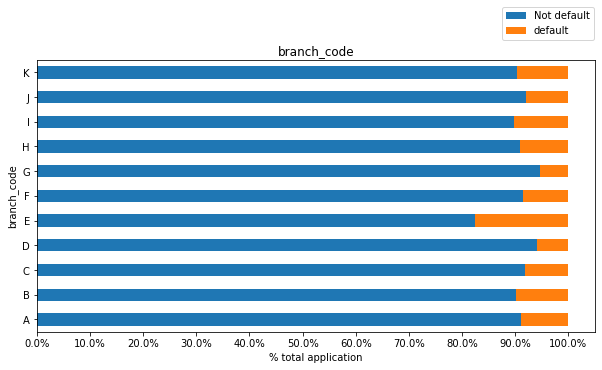

In [43]:
bar_plot(df,col_categorical,col_target)

#### branch E is most likely to have their customer default compared to other branch codes

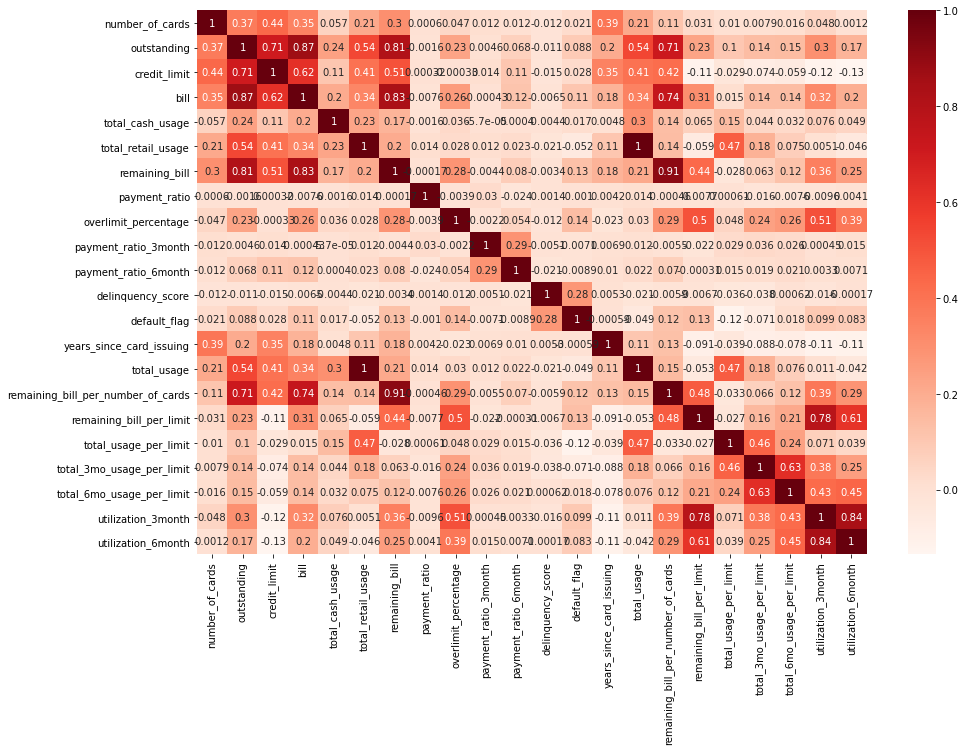

In [12]:
# plot correlation
plt.figure(figsize=(15,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

It's interesting that some independent features may cause multicollinearity (total_retail_usage and total_usage, remaining_bill and remaining_bill_per_number_of_cards), but dont fret much when the model we use is tree based, the model can handle it, different story if we choose a regression model, then we need to calculate Variance Inflation Factor (VIF), and make sure the VIF values are low between the independent features. We will calculate VIF values later (on the other jupyter file), as we decide our baseline model is logistic regression

In [13]:
df.corr()['default_flag'].abs().sort_values()

years_since_card_issuing              0.000589
payment_ratio                         0.001038
payment_ratio_3month                  0.007130
payment_ratio_6month                  0.008944
total_cash_usage                      0.017375
total_6mo_usage_per_limit             0.017959
number_of_cards                       0.021001
credit_limit                          0.028078
total_usage                           0.049363
total_retail_usage                    0.051667
total_3mo_usage_per_limit             0.070596
utilization_6month                    0.082939
outstanding                           0.087640
utilization_3month                    0.099121
bill                                  0.105897
total_usage_per_limit                 0.118604
remaining_bill_per_number_of_cards    0.120161
remaining_bill                        0.127490
remaining_bill_per_limit              0.134803
overlimit_percentage                  0.140546
delinquency_score                     0.275741
default_flag 

The data above shows that the features arent highly correlated to default flag (0.5-1 indicates high), yet there are some features that have very low correlation with the target variable, we can remove them.